In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import os
from os import *
import re
import imutils
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import collections

In [2]:
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]


In [3]:
p = '/home/jovyan/DATA_MASTER_PROJECT/CNN/A549_t5_t15_fullsize/'

t = []
for i in listdir(p):
    im =cv2.imread(p+i)
    t.append(im)

In [4]:
len(t)

66

In [5]:
def get_time_point(path, time_point_1):   # time_point in form of 'Take #1 ' (remember the space between #1 ') or 'Take #32'

    image_time_point = []

    for dirname, dirnames,filenames in os.walk(path):



        for filename in sorted(filenames, key = natural_keys):



            if time_point_1 in filename:
                
                im1 = cv2.imread(os.path.join(dirname, filename))
                if np.count_nonzero(im1 == 255) < 1000:
                    image_time_point.append(im1)
                    

    return image_time_point   

In [ ]:
# def get_time_point(path):   # time_point in form of 'Take #1 ' (remember the space between #1 ') or 'Take #32'

#     image_time_point = []

#     for i in listdir(path):
#         im =cv2.imread(path+i)
    
#         image_time_point.append(im)

#     return image_time_point   

In [32]:
s = get_time_point(p, 'C5')

In [33]:
len(s)

22

IndexError: list index out of range

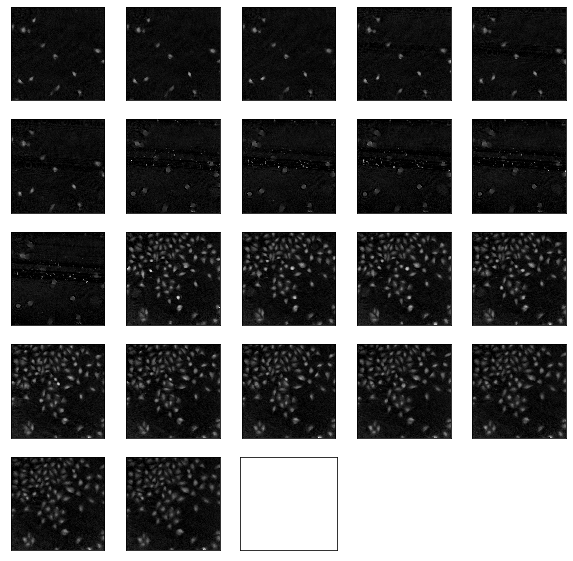

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(s[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[y_orig_1[i]])
plt.show()

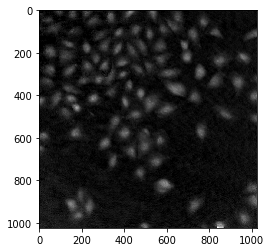

In [23]:
image = s[]
plt.imshow(image)

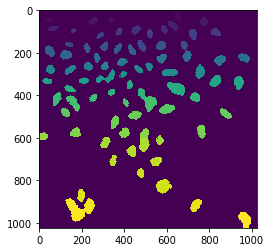

In [22]:
shifted = cv2.pyrMeanShiftFiltering(image, 10, 50)

gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

D = ndimage.distance_transform_edt(thresh)

localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]

labels = watershed(-D, markers, mask=thresh)

plt.imshow(labels)


In [6]:
def find_and_cut(path_img,time_point_1,save_path): #'Take #1 ', # "{0}/sk_{1}_exp_2_time_1.tiff"

    t_1 = get_time_point(path_img,time_point_1)

    tot_dict = {}

    for idx, image in enumerate(t_1):

        dict_1 = {}

        cx = []
        cy = []

        shifted = cv2.pyrMeanShiftFiltering(image, 10, 50)
        gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
        D = ndimage.distance_transform_edt(thresh)
        localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)
        markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
        labels = watershed(-D, markers, mask=thresh)



        for label in np.unique(labels):
            if label == 0:
                continue




            mask = np.zeros(gray.shape, dtype='uint8')
            mask[labels == label] = 255
            cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            cnts = imutils.grab_contours(cnts)
            c = max(cnts, key=cv2.contourArea)
            ((x, y), r) = cv2.minEnclosingCircle(c)



            cx.append(int(x))
            cy.append(int(y))


            data = {'X':cx,'Y':cy}

            data = pd.DataFrame(data)


        dict_1[idx] = data

        tot_dict.update(dict_1)


    t_1_1 = get_time_point(path_img, time_point_1)


    value_dict = []

    for k, v in sorted(tot_dict.items()):
        value_dict.append(v)



    crop_cell_1 = []

    for idx , i in enumerate(t_1_1):

        img = t_1_1[idx]



        x = []
        y = []

        for i in range(len(value_dict[idx])):
            x.append(value_dict[idx].iloc[i,0])      
            y.append(value_dict[idx].iloc[i,1])


        w = 45
        h = 45

        for ix, i in enumerate(x):

            crop = img[(y[ix]-h):(y[ix]+h), (x[ix]-w):(x[ix]+w)]

            if crop.size == 24300: 

                crop_cell_1.append(crop)





    for ls, i in enumerate(crop_cell_1):

        im = Image.fromarray(i)

        im.save(save_path.format(via, ls))   # exp 1 or 2 sonce they did dublicate studies 

    return crop_cell_1

In [7]:
via = '/home/jovyan/DATA_MASTER_PROJECT/CNN/cropped_images'
directory = os.mkdir(via) 

In [8]:
path_img = p


In [9]:
wells = ['B3', 'C5', 'E3']
drugs = ['dilam', 'perox', 'controll']
number_celss =[]

for i in range(len(wells)):
    croped_cell = find_and_cut(path_img, wells[i], '{0}/' + drugs[i] + '_{1}.tiff')

    number_celss.append(len(croped_cell))

In [10]:
number_celss

[338, 1204, 362]

# IF 2 CLASS CLASSIFICATION HAVE 0 AND 1 AS LABELS

In [35]:
a0 = [['dilam', 0]] * 338

a1 =[['perox', 1]] * 1204

a2 =[['controll', 2]] * 362

#a3 =[['vigabatrine', 3]] * 1432

#a4 =[['trazodone', 4]] * 799

# a5 =[['trimiparmine', 5]] * 2091

# a6 =[['triprolidine', 6]] * 1846

# a7 =[['bimatopro', 7]] * 1718

# a8 =[['trifluoper', 8]] * 4160

# a9 =[['almotriptan', 9]] * 1849

# a10 =[['tripelenammine', 10]] * 2659

# a11 =[['tropicamide', 11]] * 2166

# a12 =[['triflupromazine', 12]] * 2086

# a13 =[['vigabatrin', 13]] * 2286



labels = a0+a1+a2



In [36]:
df = pd.DataFrame(labels, columns = ['Type', 'Category'])
df = df.sort_values(by=['Type'])

In [37]:

df.to_csv("/home/jovyan/DATA_MASTER_PROJECT/CNN/labels.csv", sep=',',index=False)